<a href="https://colab.research.google.com/github/macrodatascience/fmml2021/blob/main/Module_7_FMML_Anomaly_detection_using_Isolation_Forest_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

Any data point/observation that deviates significantly from the other observations is called an **Anomaly/Outlier**. Anomaly detection is important and finds its application in various domains like detection of fraudulent bank transactions, network intrusion detection, sudden rise/drop in sales, change in customer behavior, etc.

Many techniques were developed to detect anomalies in the data. In this article, we will look at the implementation of Isolation Forests – an unsupervised anomaly detection technique.

**Isolation Forests**

Isolation Forests(IF), similar to Random Forests, are build based on decision trees. And since there are no pre-defined labels here, it is an unsupervised model.

IsolationForests were built based on the fact that anomalies are the data points that are “few and different”.

In an Isolation Forest, randomly sub-sampled data is processed in a tree structure based on randomly selected features. The samples that travel deeper into the tree are less likely to be anomalies as they required more cuts to isolate them. Similarly, the samples which end up in shorter branches indicate anomalies as it was easier for the tree to separate them from other observations.

In [1]:
marks = {'student_id': [1,2,3,4,5,6,7,8,9,10], 'marks': [95, 98, 92, 10000, 91, 89, 90, 2000, 100, 100]}
marks

{'marks': [95, 98, 92, 10000, 91, 89, 90, 2000, 100, 100],
 'student_id': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.ensemble import IsolationForest
data = pd.DataFrame(marks)
data.head()


,student_id,marks
0,1,95
1,2,98
2,3,92
3,4,10000
4,5,91


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


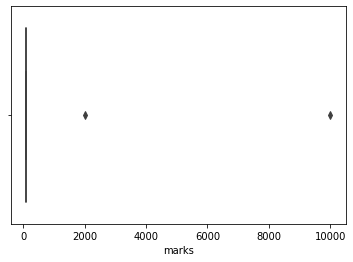

In [3]:
sns.boxplot(data.marks)

In [4]:
# Define and fit the model

random_state = np.random.RandomState(42)

model = IsolationForest(n_estimators=100, max_samples='auto', contamination = float(0.2), random_state=random_state)
model.fit(data[['marks']])
print(model.get_params())

{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7F9CCCFE05A0, 'verbose': 0, 'warm_start': False}


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  "X does not have valid feature names, but"


In [5]:
# Score the data to obtain anomaly scores:

data['scores'] = model.decision_function(data[['marks']])

data['anomaly_score'] = model.predict(data[['marks']])

data[data['anomaly_score']==-1].head()

,student_id,marks,scores,anomaly_score
3,4,10000,-0.318638,-1
7,8,2000,-0.211458,-1


In [6]:
data['anomaly_score']

0    1
1    1
2    1
3   -1
4    1
5    1
6    1
7   -1
8    1
9    1
Name: anomaly_score, dtype: int64

In [9]:
# Model Evaluation:
anomaly_count = 2
accuracy = 100*list(data['anomaly_score']).count(-1)/(anomaly_count)
print("Accuracy of the model:", accuracy)

Accuracy of the model: 100.0


**Limitations of Isolation Forest:**

Isolation Forests are computationally efficient and
have been proven to be very effective in Anomaly detection. Despite its advantages, there are a few limitations as mentioned below.

1. The final anomaly score depends on the contamination parameter, provided while training the model. This implies that we should have an idea of what percentage of the data is anomalous beforehand to get a better prediction.

2. Also, the model suffers from a bias due to the way the branching takes place.

https://www.analyticsvidhya.com/blog/2021/07/anomaly-detection-using-isolation-forest-a-complete-guide/
